In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LogisticRegression

In [3]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/josephpeart/scikit_learn_data


In [6]:
data.data.shape # 400 rows with 4096 features

(400, 4096)

In [7]:
X = data.data

In [8]:
type(data) # bunch type, essentially a dict

sklearn.utils._bunch.Bunch

In [10]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [13]:
y = data.target # store targets in y 

In [40]:
np.unique(y, return_counts=True) # check the number of classes 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

In [17]:
images = data.images # get image data

In [19]:
images.shape

(400, 64, 64)

In [20]:
X.shape

(400, 4096)

In [33]:
all(images[0].ravel() == X[0]) # show that the ravelled image is equivalent to the 1d vector 

True

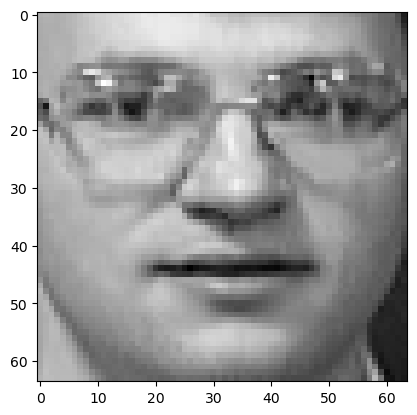

In [43]:
import matplotlib.pyplot as plt

plt.imshow(images[50], cmap='gray')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,) # 20% Testing, 80% Training

In [55]:
model = LogisticRegression() 
model.fit(X_train, y_train)

/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
model.score(X_train, y_train)

1.0

In [57]:
import sklearn.metrics as m

In [58]:
y_pred = model.predict(X_test)

In [59]:
m.accuracy_score(y_pred, y_test)

0.9083333333333333

In [60]:
y_pred, y_test

(array([27, 30,  5, 38,  3, 23, 24,  4, 24,  4, 35, 18, 36, 26, 22, 20, 23,
         3, 15,  2, 39, 20,  5, 38, 29, 37, 26, 27, 25, 28, 13, 39,  9, 38,
        11, 10, 16, 16, 22, 27, 11, 19, 29, 23, 15,  9, 26, 34, 25, 17,  5,
         7, 21, 33,  4, 23, 12,  4,  6, 37, 14, 16, 27,  1, 22, 11, 15, 25,
        13,  6, 22, 34, 26,  9, 12, 20,  9, 32, 33, 29, 13, 10, 39, 26,  0,
        32, 19,  3, 10, 37,  0, 26, 35, 16, 15, 18, 34, 35,  8, 20, 31,  7,
        24, 27,  0, 36, 15, 26,  7, 33, 14, 11, 21, 32,  6, 12, 16, 28, 11,
        39]),
 array([27, 30,  5,  7,  3, 23, 24,  4, 24,  4, 35, 18, 36, 26, 22, 20, 23,
         3, 15, 39, 39, 20,  5,  7, 29, 37, 26, 27, 25, 28, 13, 39,  7,  7,
        11, 10, 16, 16, 22, 27, 11, 19, 29, 23, 15,  9, 26, 34, 25, 17,  4,
        23, 21, 33,  4, 23, 12,  4,  6, 39, 14, 16, 27,  1, 25, 11, 15, 25,
        13,  6, 22, 34, 26,  9, 12, 20,  9, 32, 33, 29, 13, 10,  9, 26,  0,
        32, 19,  3, 10, 37,  0, 26, 35, 16, 15, 18, 34, 35,  8,  3, 31,  7

In [61]:
print(m.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       0.80      1.00      0.89         4
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       0.33      0.67      0.44         3
           8       1.00      1.00      1.00         1
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

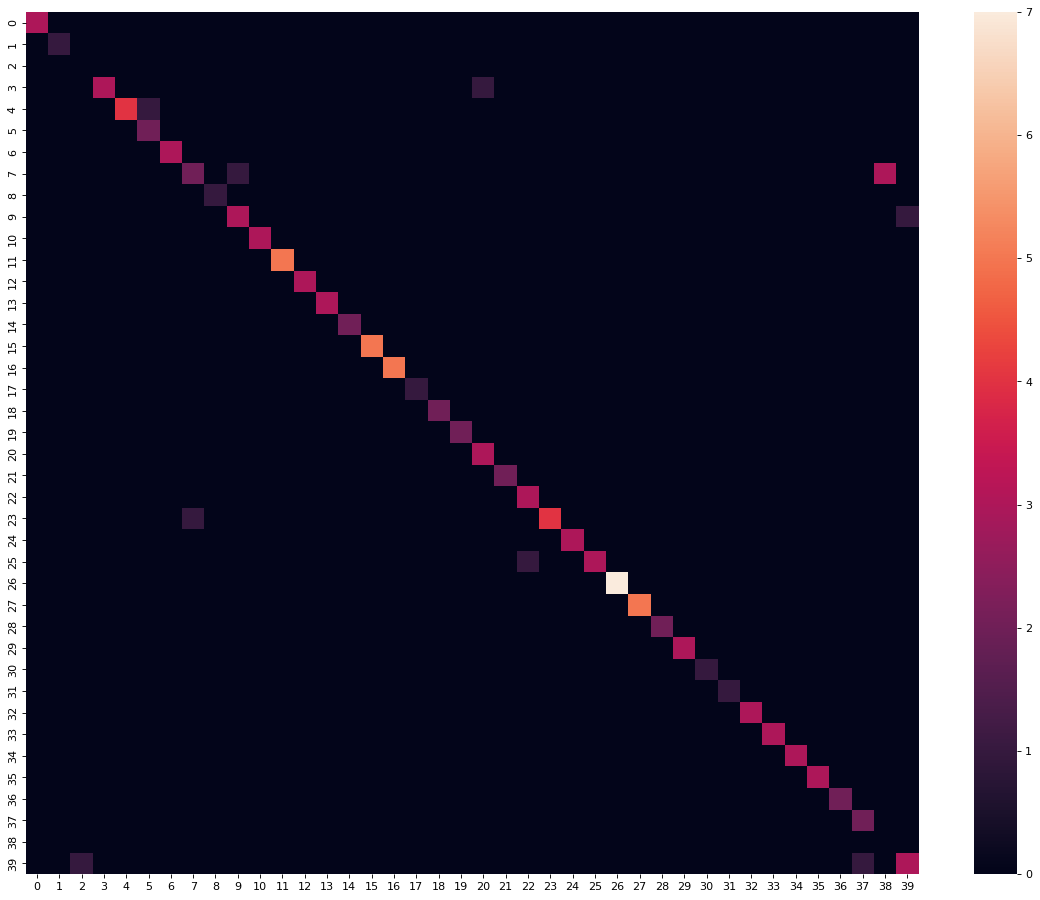

In [71]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(18, 14), dpi=80)
sns.heatmap(m.confusion_matrix(y_test, y_pred))

In [74]:
import sys
import numpy
numpy.set_printoptions(threshold=50)

In [72]:
from sklearn.datasets import fetch_lfw_people
data_too = fetch_lfw_people(min_faces_per_person=25, color=True)

sklearn.datasets.fetch_lfw_people(*, data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)

In [76]:
X_too = data_too.data

In [77]:
images_too = data_too.images

In [78]:
y_too = data_too.target

In [79]:
X_too.shape

(2588, 8742)

In [80]:
images_too.shape

(2588, 62, 47, 3)

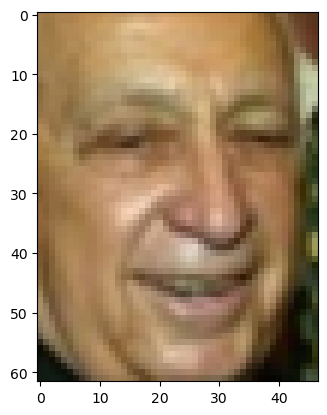

In [85]:
plt.imshow(images_too[9])

In [86]:
images_too[0,0,0]

array([0.16862746, 0.14509805, 0.14509805], dtype=float32)

In [87]:
62 * 47 * 3

8742

In [94]:
np.unique(y_too, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 array([ 39,  35,  36,  77,  42,  29, 236,  31, 121, 530, 109,  44,  26,
         30,  39,  71,  28,  52,  55,  42,  53,  31,  28,  60,  32,  41,
         41,  48,  29,  33,  37,  30,  27,  32,  26,  52,  33,  25,  33,
        144,  32,  49]))

In [95]:
classes, counts = np.unique(y_too, return_counts=True)

In [96]:
classes[np.argmax(counts)]

9

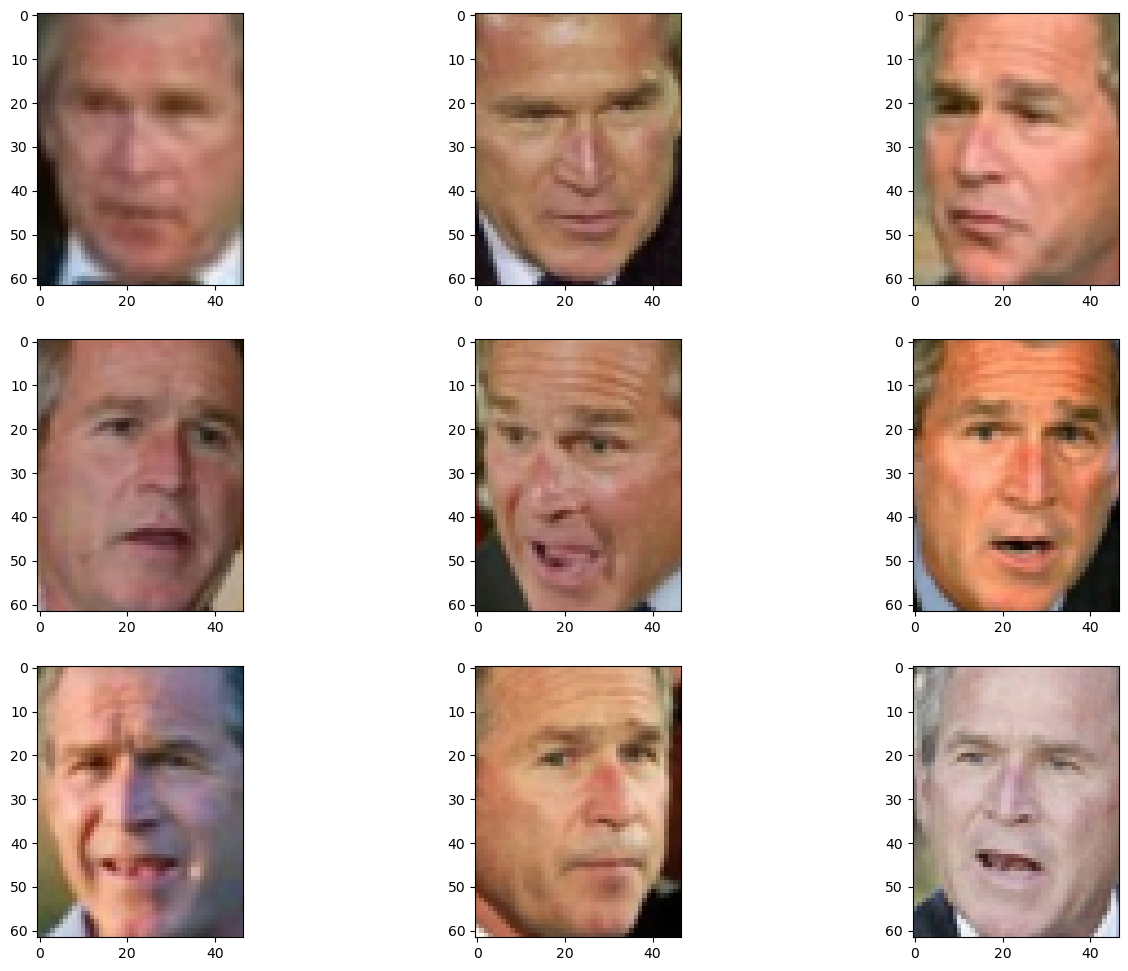

In [121]:
mister_9 = X_too[y_too == 9]
count = 0
fig, axes = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(mister_9[count].reshape(62,47,3))
        count += 1

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_too, y_too, test_size=.2,) # 20% Testing, 80% Training

In [90]:
clf = LogisticRegression()

In [91]:
clf.fit(X_train, y_train)

/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
clf.score(X_train, y_train)

0.9642512077294686

In [93]:
y_pred = clf.predict(X_test)

In [110]:
print(m.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.88      0.58      0.70        12
           2       0.33      0.29      0.31         7
           3       0.33      0.42      0.37        12
           4       0.50      0.67      0.57         6
           5       0.60      0.75      0.67         4
           6       0.65      0.86      0.74        43
           7       0.60      0.43      0.50         7
           8       0.68      0.90      0.78        21
           9       0.79      0.87      0.83       112
          10       0.54      0.71      0.61        21
          11       0.57      1.00      0.73         8
          12       1.00      0.14      0.25         7
          13       1.00      0.44      0.62         9
          14       1.00      0.75      0.86         8
          15       0.73      0.62      0.67        13
          16       0.50      0.17      0.25         6
          17       0.38    

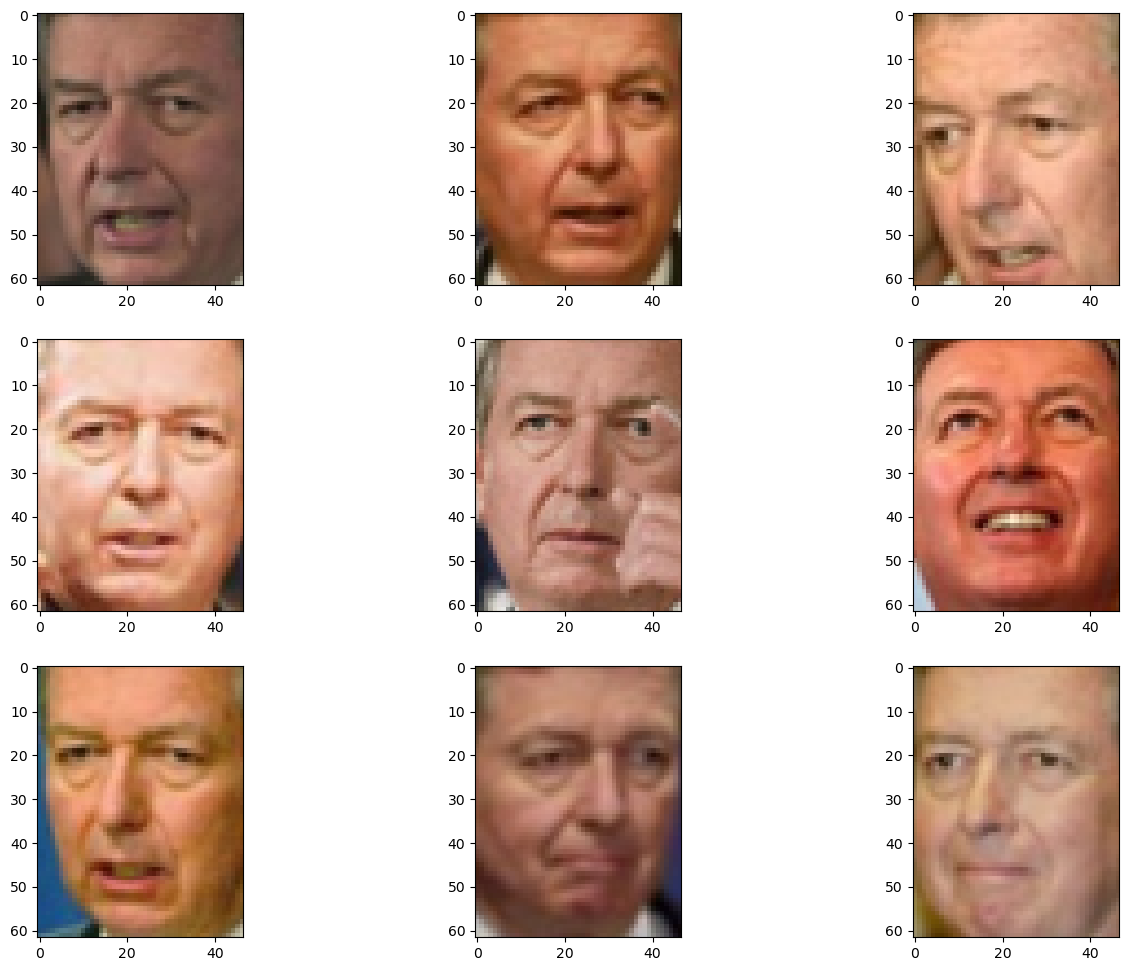

In [120]:
mister_20 = X_too[y_too == 20]
count = 0
fig, axes = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(mister_20[count].reshape(62,47,3))
        count += 1

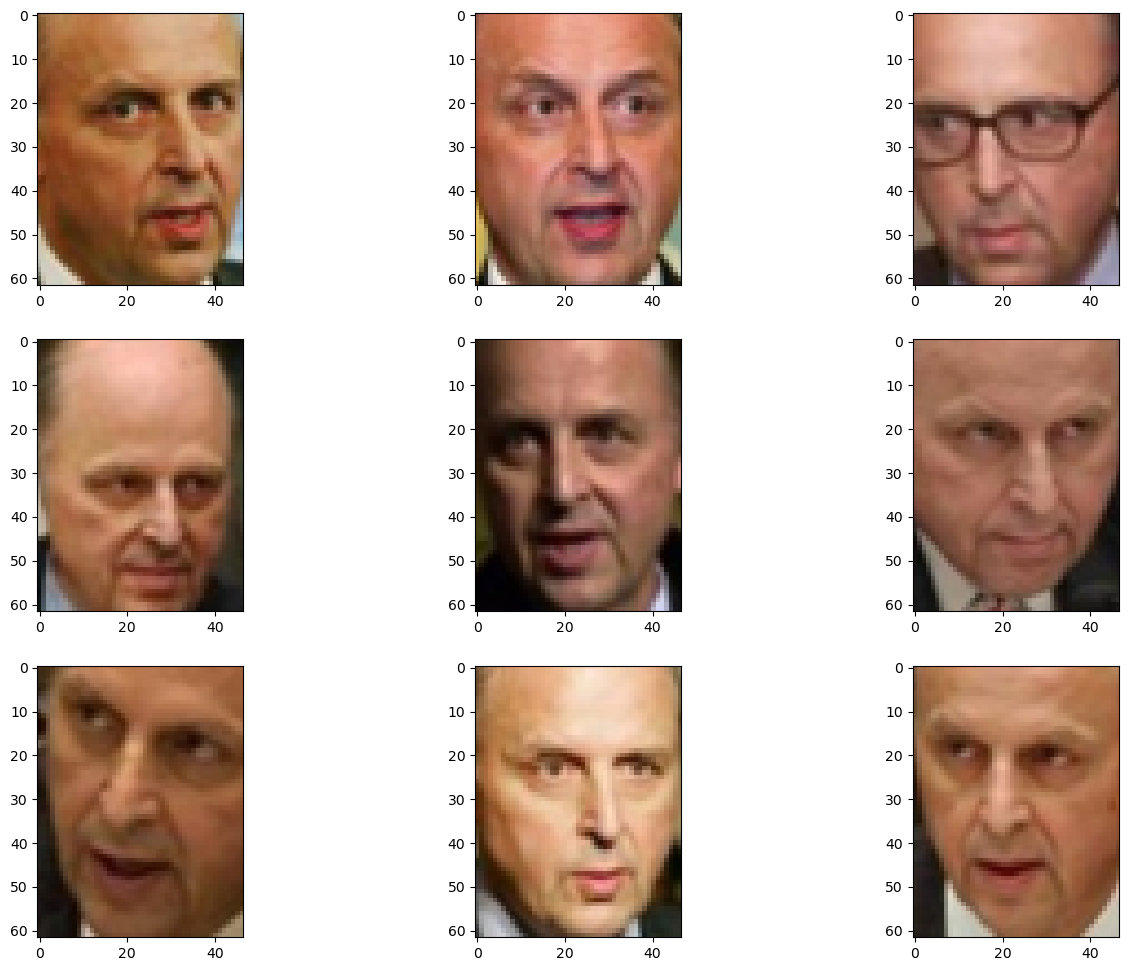

In [116]:
mister_21 = X_too[y_too == 21]
count=0

fig, axes = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(mister_21[count].reshape(62,47,3))
        count +=1

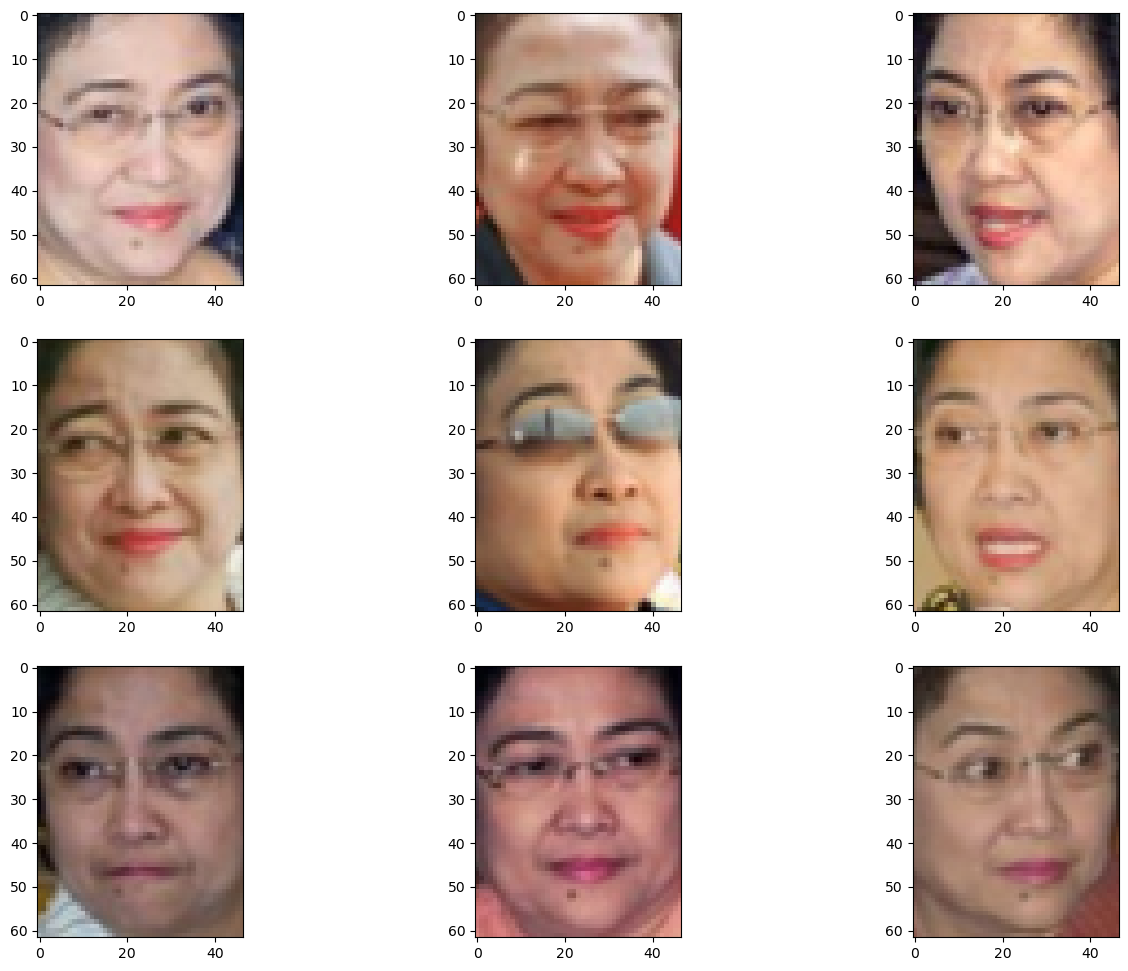

In [117]:
mister_29 = X_too[y_too == 29]
count=0

fig, axes = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(mister_29[count].reshape(62,47,3))
        count +=1

In [119]:
print(data_too.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC